# 다중 퍼셉트론(XOR)
---

In [2]:
import torch

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(0)

if device == 'cuda' :
    torch.cuda.manual_seed_all(0)

In [4]:
X = torch.FloatTensor([[0,0], [0,1], [1, 0], [1, 1]]).to(device)
y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [5]:
model = nn.Sequential(
        nn.Linear(2, 10, bias=True),
        nn.Sigmoid(),
        nn.Linear(10, 10, bias=True),
        nn.Sigmoid(),
        nn.Linear(10, 10, bias=True),
        nn.Sigmoid(),
        nn.Linear(10, 1, bias=True),
        nn.Sigmoid()).to(device)

In [6]:
# BCELOSS() : 이진분류에서 사용하는 크로스엔트로피 함수
criterion = torch.nn.BCELoss().to(device) 
optimizer = torch.optim.SGD(model.parameters(), lr =1)

In [7]:
for epoch in range(10001) :
    optimizer.zero_grad()
    h = model(X)
    
    cost = criterion(h, y)
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0 :
        print(epoch, cost.item())
    

0 0.7478640079498291
100 0.6931487321853638
200 0.6931484937667847
300 0.6931482553482056
400 0.6931480169296265
500 0.6931477785110474
600 0.6931474804878235
700 0.6931471824645996
800 0.6931469440460205
900 0.6931466460227966
1000 0.6931463479995728
1100 0.6931460499763489
1200 0.6931458115577698
1300 0.6931455135345459
1400 0.693145215511322
1500 0.6931447982788086
1600 0.6931445598602295
1700 0.6931442022323608
1800 0.6931438446044922
1900 0.6931434273719788
2000 0.6931431293487549
2100 0.6931426525115967
2200 0.6931422352790833
2300 0.693141758441925
2400 0.6931413412094116
2500 0.6931408643722534
2600 0.6931403875350952
2700 0.6931398510932922
2800 0.6931393146514893
2900 0.6931386590003967
3000 0.693138062953949
3100 0.6931372880935669
3200 0.6931366324424744
3300 0.6931359171867371
3400 0.6931350827217102
3500 0.6931342482566833
3600 0.6931332945823669
3700 0.6931323409080505
3800 0.6931312084197998
3900 0.6931300759315491
4000 0.6931288838386536
4100 0.6931275129318237
4200 0.

In [9]:
with torch.no_grad() :
    h = model(X)
    pred = (h > 0.5).float()
    acc = (pred == y).float().mean()
    print(f'모델의 출력값(Hypothesis) : {h.detach().cpu().numpy()}')
    print(f'모델의 예측값(Predicted) : {pred.detach().cpu().numpy()}')    
    print(f'실제값(y) : {y.cpu().numpy()}')
    print(f'정확도(Accuracy) : {acc.item()}')

모델의 출력값(Hypothesis) : [[2.2993753e-04]
 [9.9966311e-01]
 [9.9967861e-01]
 [3.3755178e-04]]
모델의 예측값(Predicted) : [[0.]
 [1.]
 [1.]
 [0.]]
실제값(y) : [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy) : 1.0


In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Sigmoid

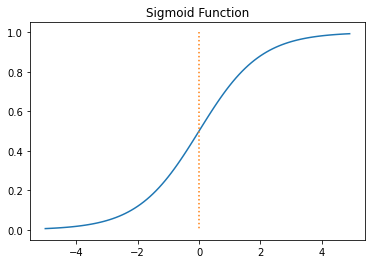

In [14]:
def sigmoid(x) :
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0, 0], [1.0, 0.0], ':')

plt.title('Sigmoid Function')
plt.show()

## Relu

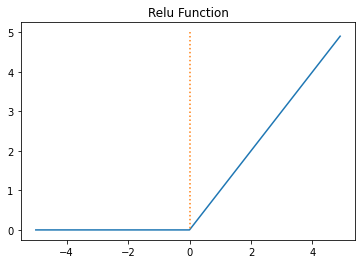

In [15]:
def relu(x) :
    return np.maximum(0, x)


x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)


plt.plot(x, y)
plt.plot([0, 0], [5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

## Leaky Relu (Relu 변형함수)

In [16]:
# 입력값이 음수면 기울기가 0이 되어 relu가 죽는것을 보완하기 위해 변형 함수가 등장
a=0.1

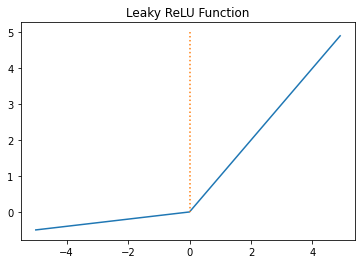

In [17]:
def leaky_relu(x) :
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)


plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## Softmax

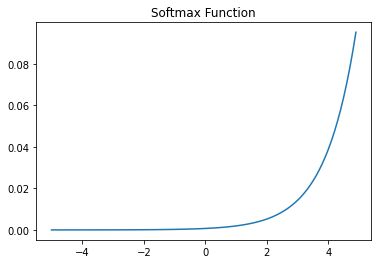

In [19]:
# 출력층 뉴런에서 주로 사용(,sigmoid)
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# 손글씨 데이터 분류 with MLP
---

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [21]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [22]:
print(digits.target[0])

0


In [23]:
print(f'전체 샘플의 수 : {len(digits.images)}')

전체 샘플의 수 : 1797


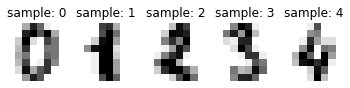

In [25]:
imgs_and_labels = list(zip(digits.images, digits.target))
for idx, (img, label) in enumerate(imgs_and_labels[:5]) : 
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i'%label)

In [27]:
for i in range(5) :
    print(f'{i}번 인덱스 샘플의 레이블 : {digits.target[i]}')

0번 인덱스 샘플의 레이블 : 0
1번 인덱스 샘플의 레이블 : 1
2번 인덱스 샘플의 레이블 : 2
3번 인덱스 샘플의 레이블 : 3
4번 인덱스 샘플의 레이블 : 4


In [29]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [30]:
X = digits.data
y = digits.target

In [31]:
import torch
import torch.nn as nn
from torch import optim

In [32]:
model = nn.Sequential(
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 10))

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [33]:
loss_fn = nn.CrossEntropyLoss()

In [34]:
optimizer = optim.Adam(model.parameters())

In [35]:
losses = []

In [36]:
for epoch in range(100) :
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.337175
Epoch   10/100 Cost: 2.090664
Epoch   20/100 Cost: 1.826225
Epoch   30/100 Cost: 1.521552
Epoch   40/100 Cost: 1.185452
Epoch   50/100 Cost: 0.864065
Epoch   60/100 Cost: 0.587410
Epoch   70/100 Cost: 0.407605
Epoch   80/100 Cost: 0.301335
Epoch   90/100 Cost: 0.235087


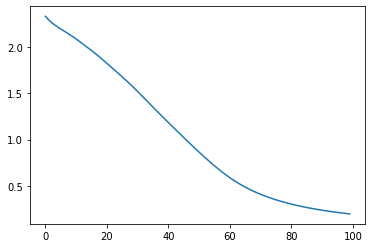

In [37]:
plt.plot(losses)

# Mnist 데이터 분류 with MLP
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [7]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [10]:
mnist.data[0]
mnist.target[0]

'5'

In [11]:
mnist.target = mnist.target.astype(np.int8)

X = mnist.data / 255 # 0 ~ 255 값을 [0, 1] 구간으로 정규화
y = mnist.target

X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

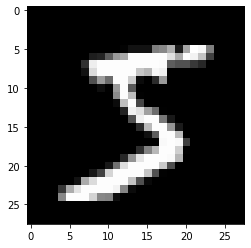

In [13]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')

In [14]:
# Train, test split
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_train, y_train)

loader_train = DataLoader(ds_train, batch_size = 64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size = 64, shuffle=False)

In [20]:
from torch import nn
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [21]:
from torch import optim

# loss function
loss_fn = nn.CrossEntropyLoss()

# 가중치 최적화 기법
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [24]:
def train(epoch) :
    model.train()
    
    for data, targets in loader_train : # 데이터로더에서 미니배치를 하나씩 꺼내 학습 수행
        optimizer.zero_grad() # 경사 초기화
        outputs = model(data) # 데이터를 입력, 출력 계산
        loss = loss_fn(outputs, targets) # 오차 계산
        loss.backward() # 오차 역전파 계산
        optimizer.step() # 가중치 수정
        
    print(f'epoch{epoch} : 완료 \n')

def test() :
    model.eval()
    corr = 0
    
    with torch.no_grad() : # 데이터로더에서 미니배치를 하나씩 꺼내 추론 수행
        for data, targets in loader_test :
            outputs = model(data)
            _, pred = torch.max(outputs.data, 1)
            corr += pred.eq(targets.data.view_as(pred)).sum() # 정답이면 +1
            
    # 정확도 출력
    data_num = len(loader_test.dataset)
    print(f'\n 테스트 데이터에서 예측 정확도 : {corr}/{data_num} ({100. * corr / data_num:.0f}%)\n')

In [25]:
test()


 테스트 데이터에서 예측 정확도 : 997/10000 (10%)



In [26]:
for epoch in range(3) :
    train(epoch)

test()

epoch0 : 완료 

epoch1 : 완료 

epoch2 : 완료 


 테스트 데이터에서 예측 정확도 : 9563/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다.


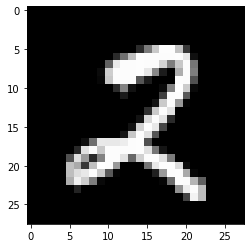

In [30]:
idx = 2018

model.eval()
data = X_test[idx]
output = model(data)
_, pred = torch.max(output.data, 0)

print(f'예측 결과 : {pred}')

X_test_show = (X_test[idx]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print(f'이 이미지 데이터의 정답 레이블은 {y_test[idx]:.0f}입니다.')